In [4]:
import os
import tensorflow as tf
import numpy as np
# Import the CnnClient class

from rlwe_xmkckks import RLWE  # Assuming RLWE is used again
import utils
from load_covid import *
# Define the path to the saved model

# Directory containing the test set
current_directory = os.getcwd()

X_train, X_test, y_train, y_test = load_raw_covid_data(limit=500)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1) #, random_state=1

print("Test set loaded successfully!")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

def evaluate(model):  # type: ignore
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Evaluation results - Loss: {loss}, Accuracy: {accuracy}")
    return loss, len(X_test), {"accuracy": accuracy}


model_path = os.path.join(current_directory, "local_trained_model")

# Load the trained model
loaded_model = tf.keras.models.load_model(model_path)

evaluate(loaded_model)



/home/jmulvany/thesis_implementation/MSc-thesis-xmkckks/data/covid


[========================================================================] 100%


COVID images converting done


[========================================================================] 100%


non covid images converting done
Test set loaded successfully!
X_test shape: (200, 128, 128, 1)
y_test shape: (200,)
7/7 [==============================] - 3s 69ms/step - loss: 3.6023 - accuracy: 0.9400
Evaluation results - Loss: 3.6023108959198, Accuracy: 0.9399999976158142


(3.6023108959198, 200, {'accuracy': 0.9399999976158142})

In [ ]:
import os

# Define the paths to the folders
data_dir = "data"
covid_dir = os.path.join(data_dir, "covid")
noncovid_dir = os.path.join(data_dir, "noncovid")

def count_images(folder_path):
    """
    Count the number of image files in a given folder.
    """
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return 0
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count images in each folder
num_covid_images = count_images(covid_dir)
num_noncovid_images = count_images(noncovid_dir)

# Print the results
print(f"Number of images in 'covid' folder: {num_covid_images}")
print(f"Number of images in 'noncovid' folder: {num_noncovid_images}")

1/1 [==============================] - 0s 196ms/step


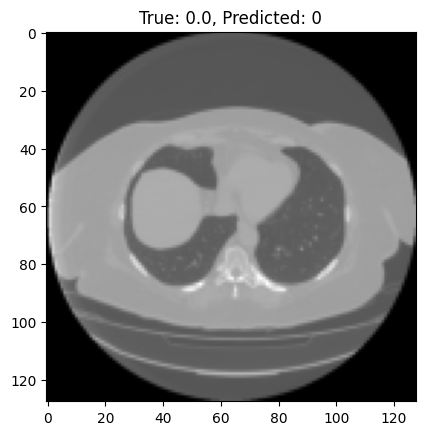

1/1 [==============================] - 0s 37ms/step


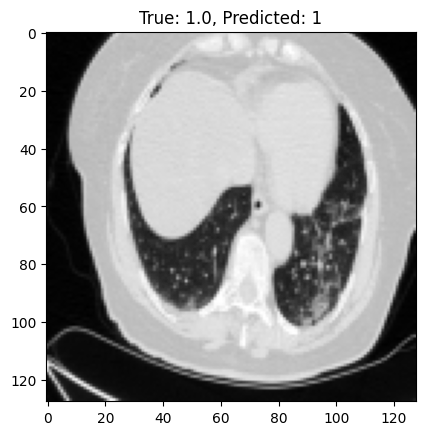

1/1 [==============================] - 0s 37ms/step


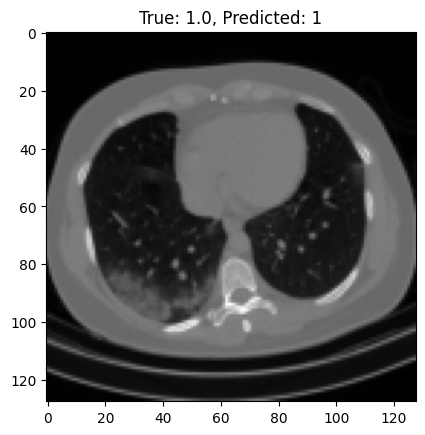

1/1 [==============================] - 0s 35ms/step


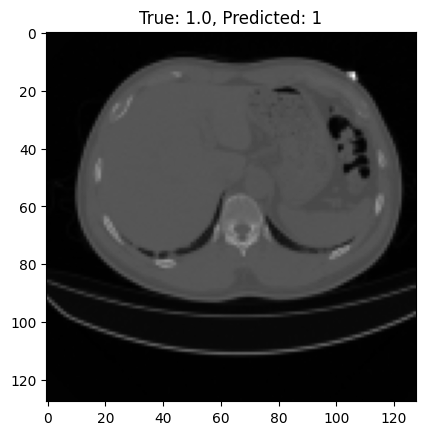

1/1 [==============================] - 0s 30ms/step


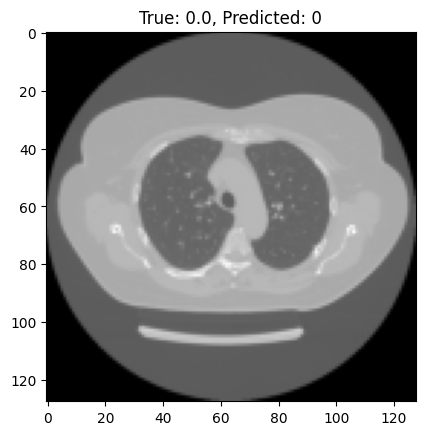

1/1 [==============================] - 0s 41ms/step


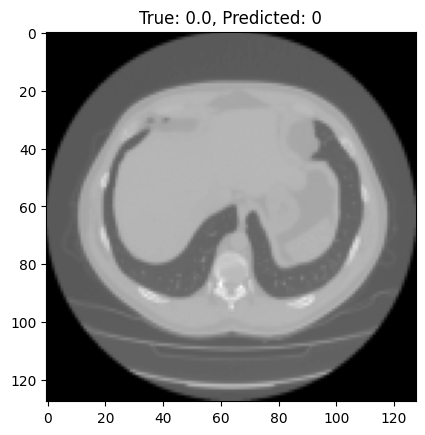

1/1 [==============================] - 0s 25ms/step


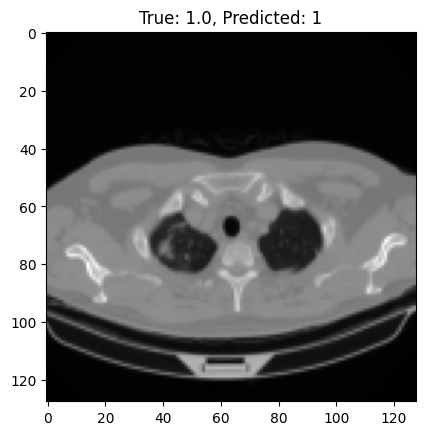

1/1 [==============================] - 0s 30ms/step


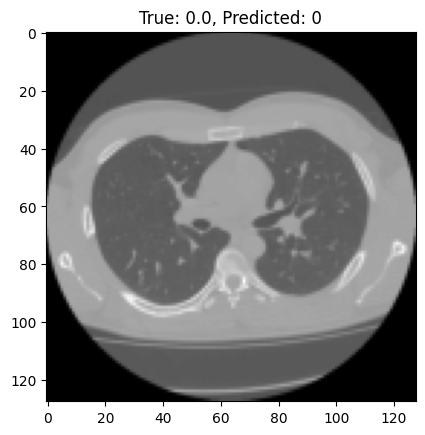

1/1 [==============================] - 0s 38ms/step


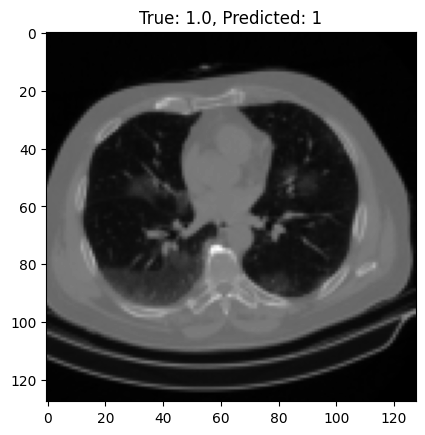

1/1 [==============================] - 0s 28ms/step


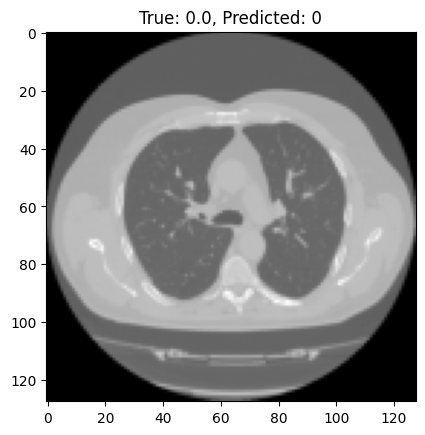

1/1 [==============================] - 0s 26ms/step


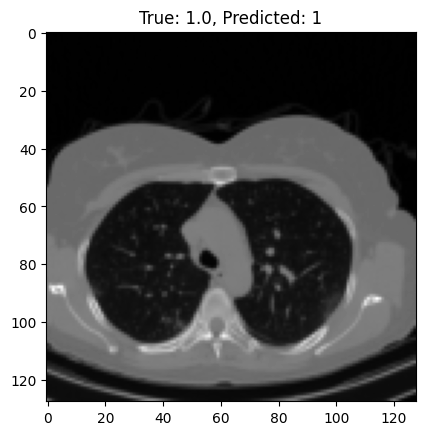

1/1 [==============================] - 0s 47ms/step


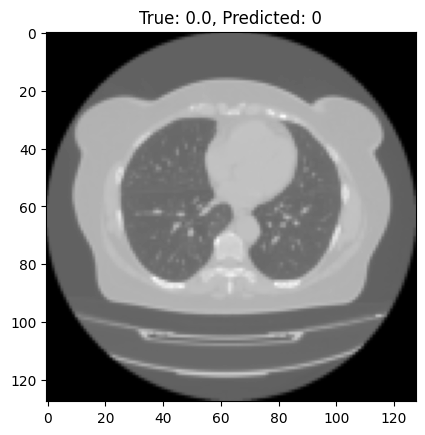

1/1 [==============================] - 0s 25ms/step


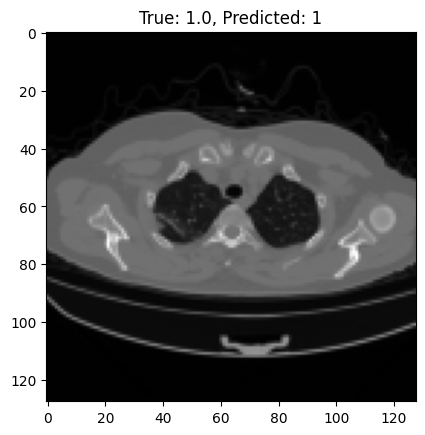

1/1 [==============================] - 0s 29ms/step


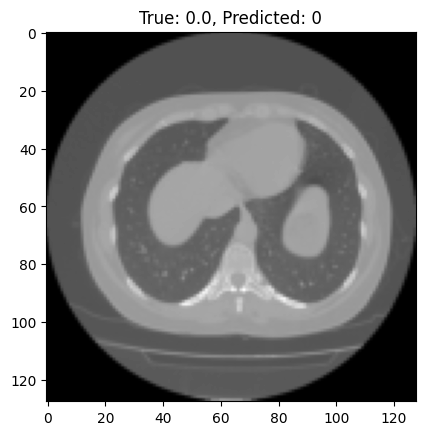

1/1 [==============================] - 0s 27ms/step


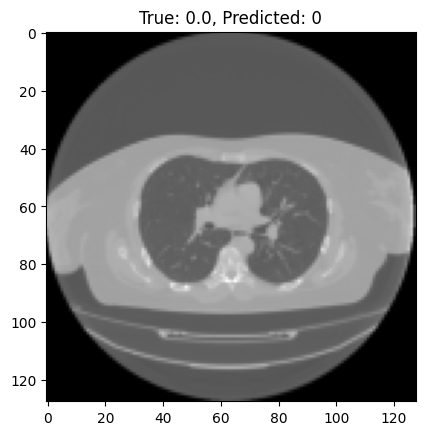

1/1 [==============================] - 0s 27ms/step


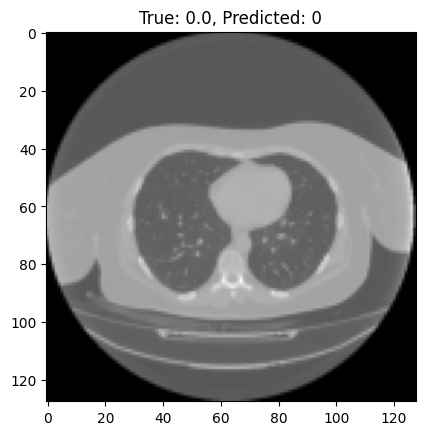

1/1 [==============================] - 0s 30ms/step


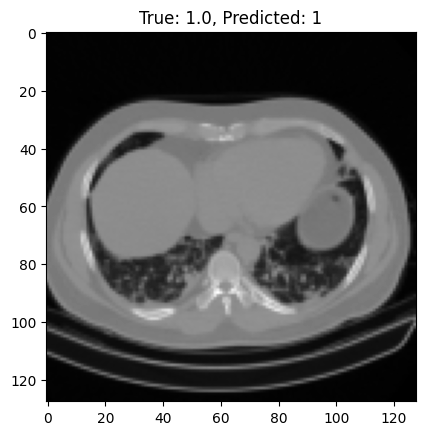

1/1 [==============================] - 0s 28ms/step


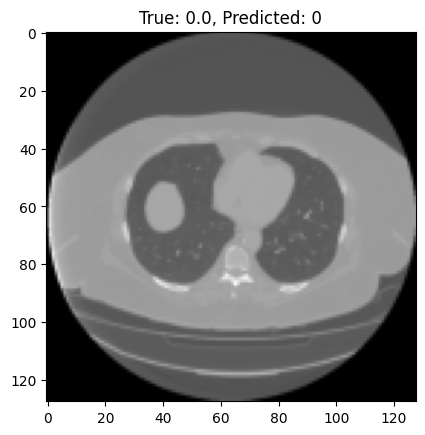

1/1 [==============================] - 0s 33ms/step


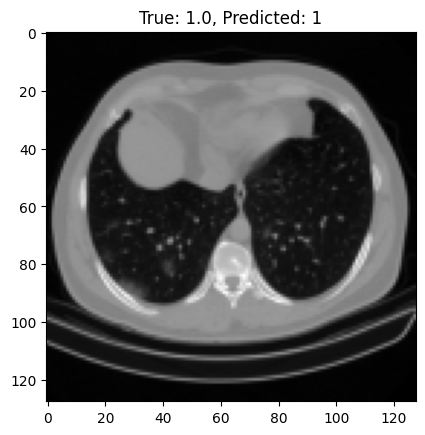

1/1 [==============================] - 0s 38ms/step


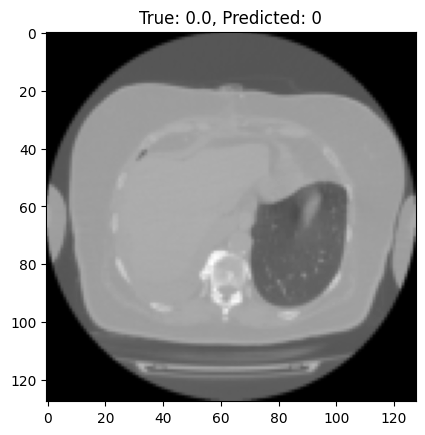

1/1 [==============================] - 0s 31ms/step


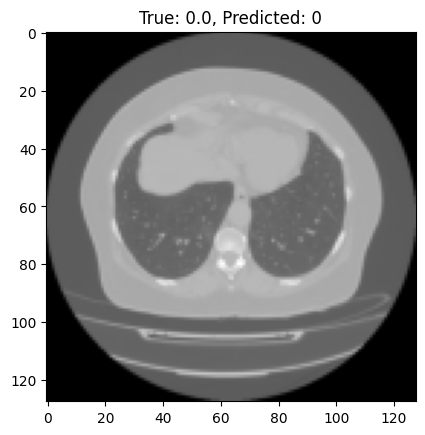

1/1 [==============================] - 0s 25ms/step


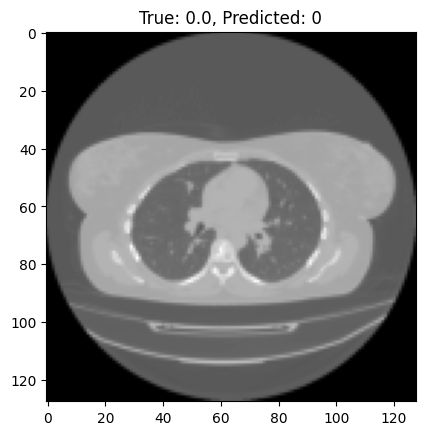

1/1 [==============================] - 0s 36ms/step


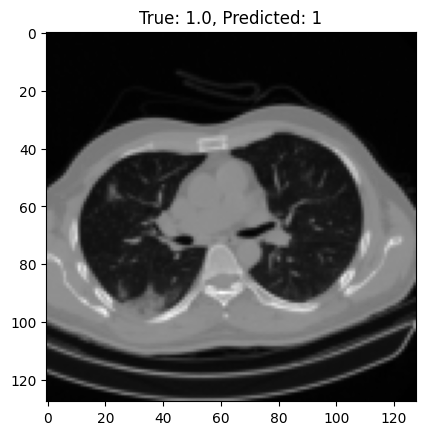

1/1 [==============================] - 0s 37ms/step


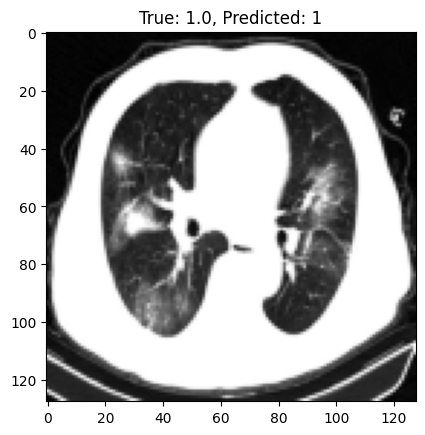

1/1 [==============================] - 0s 49ms/step


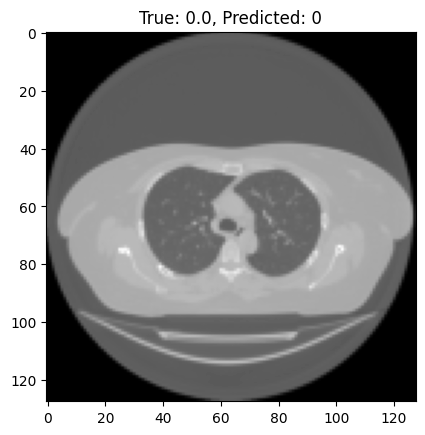

1/1 [==============================] - 0s 36ms/step


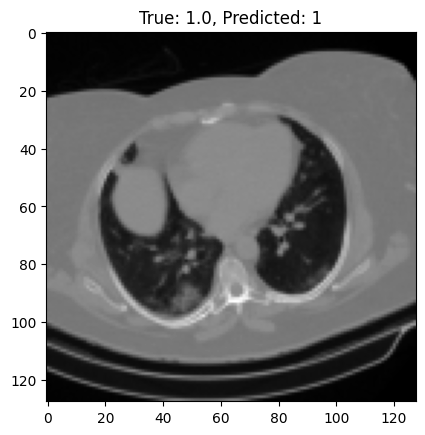

1/1 [==============================] - 0s 37ms/step


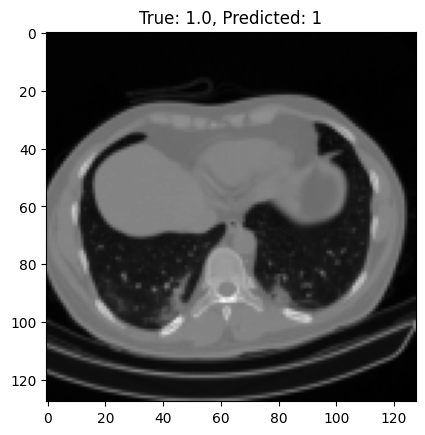

1/1 [==============================] - 0s 38ms/step


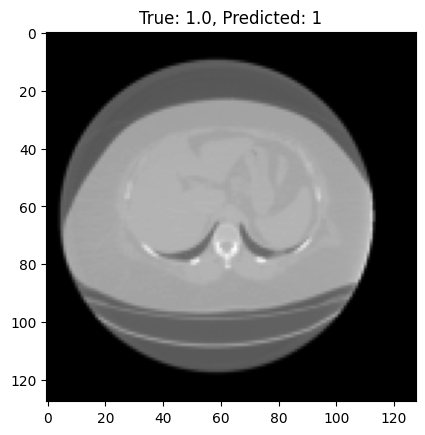

1/1 [==============================] - 0s 44ms/step


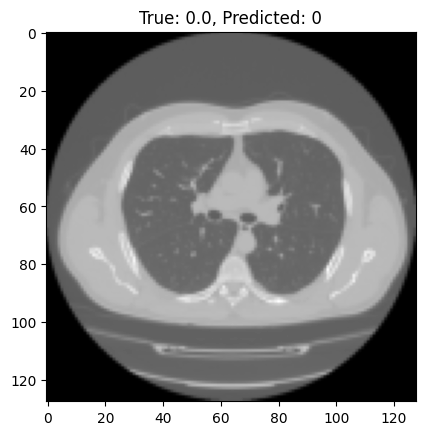

1/1 [==============================] - 0s 35ms/step


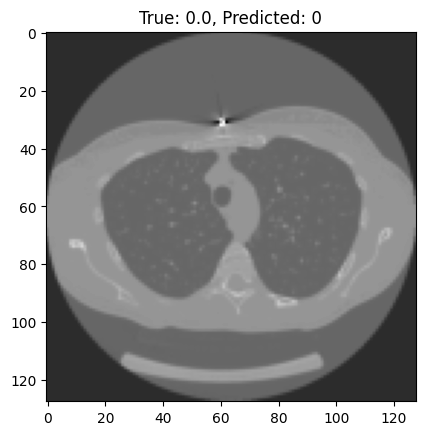

1/1 [==============================] - 0s 41ms/step


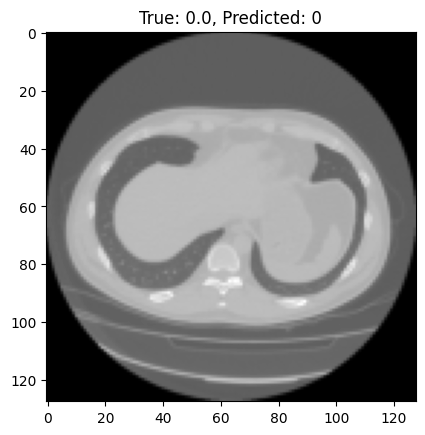

1/1 [==============================] - 0s 92ms/step


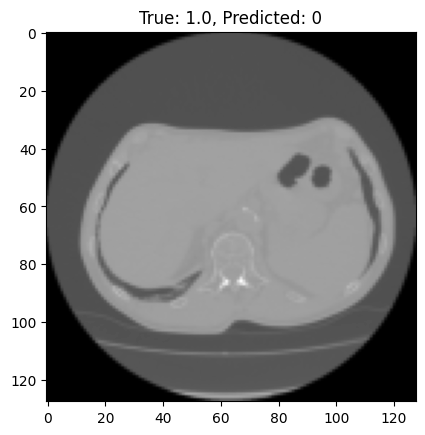

1/1 [==============================] - 0s 35ms/step


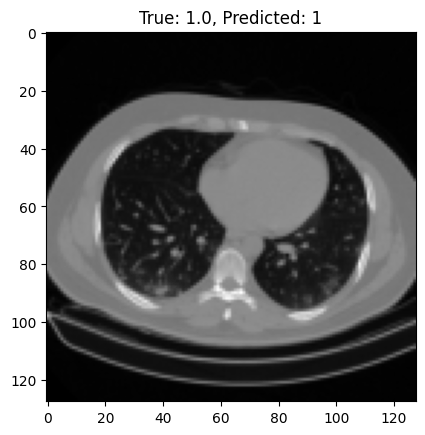

1/1 [==============================] - 0s 32ms/step


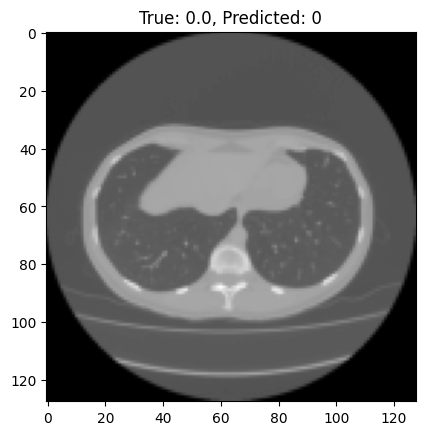

1/1 [==============================] - 0s 58ms/step


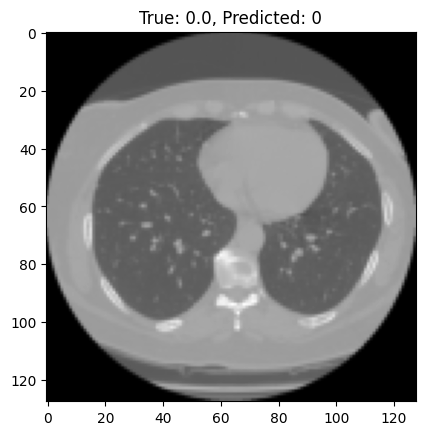

1/1 [==============================] - 0s 57ms/step


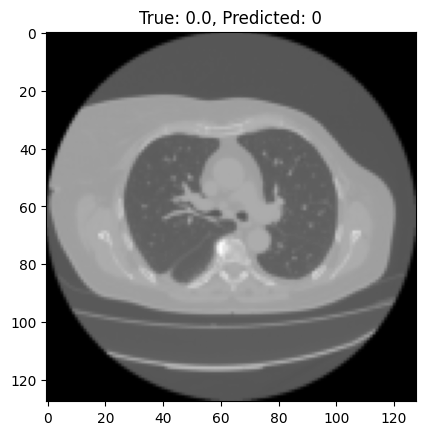

1/1 [==============================] - 0s 121ms/step


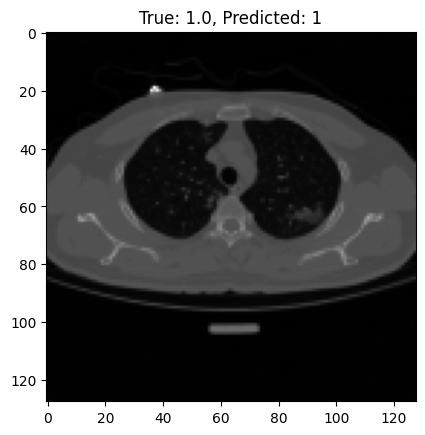

1/1 [==============================] - 0s 102ms/step


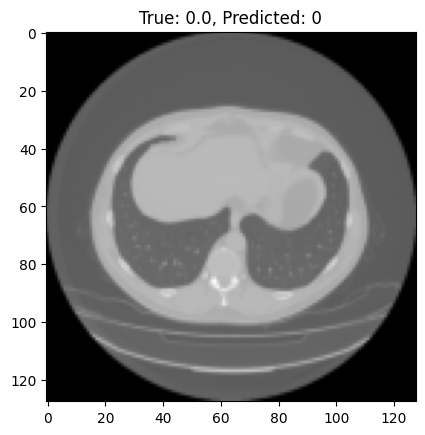

1/1 [==============================] - 0s 56ms/step


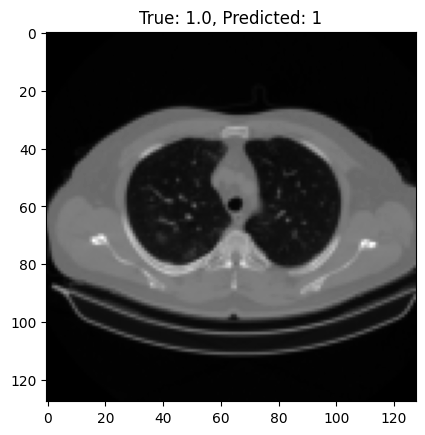

1/1 [==============================] - 0s 86ms/step


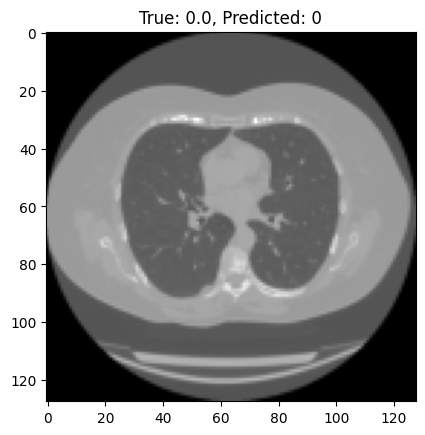

In [5]:
import matplotlib.pyplot as plt

for i in range(40):  # Visualize first 5 test samples
    plt.imshow(X_train[i:i+1].reshape(128, 128), cmap="gray")
    plt.title(f"True: {y_train[i]}, Predicted: {np.argmax(loaded_model.predict(X_train[i:i+1]))}")
    plt.show()
